## Plotting $\dot{V}O_2$

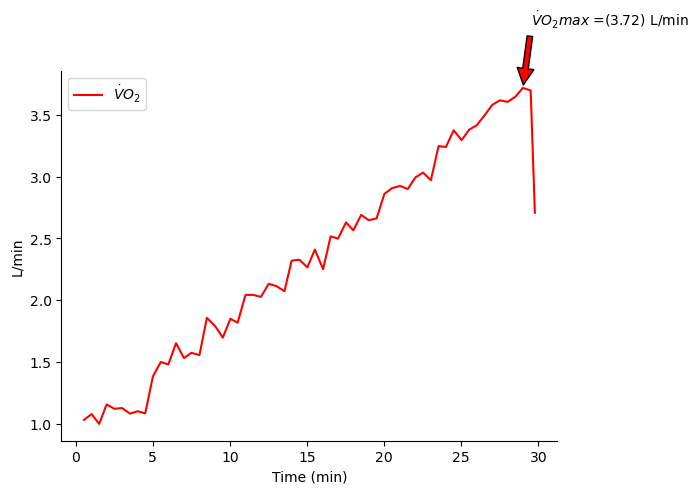

In [11]:

# import things we need
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# read file
df = pd.read_csv('../input/demo-knes381/subject_1432.csv', header=[0], skiprows=[1,2,3])

# rename our column headers
df = df.rename(columns={'VE/': 'VE/VO2','VE/.1': 'VE/VCO2'})

x = df['TIME']
y = df['VO2']
y1 = df['VE']

#Find VO2 max (x,y) values
ymax = max(y)
xmax = x[y.argmax()]

fig, ax = plt.subplots(1)

# this line seperates the two plots...
# fig.subplots_adjust(hspace=0)

# annotate the position of V02 max before plotting the value, we could do this later but why.

ax.annotate('$\dot VO_2max$ =({}) L/min'.format(round(ymax, 2)), 
               xy=(xmax, ymax), xytext=(xmax+.5, ymax+ .5),
               arrowprops=dict(facecolor='red', shrink= 0.05),
                )
# VO2 plot
ax.plot(x, y, label=('$\dot VO_2$'), c='r' )
ax.spines[['right', 'top']].set_visible(False)
ax.set(ylabel=('L/min'))
ax.set(xlabel=('Time (min)'))
ax.legend()

# save the figure before we show it... or it will be blank
fig.savefig("VO2-VE-1432.png", dpi=300, bbox_inches = "tight")
fig.show()

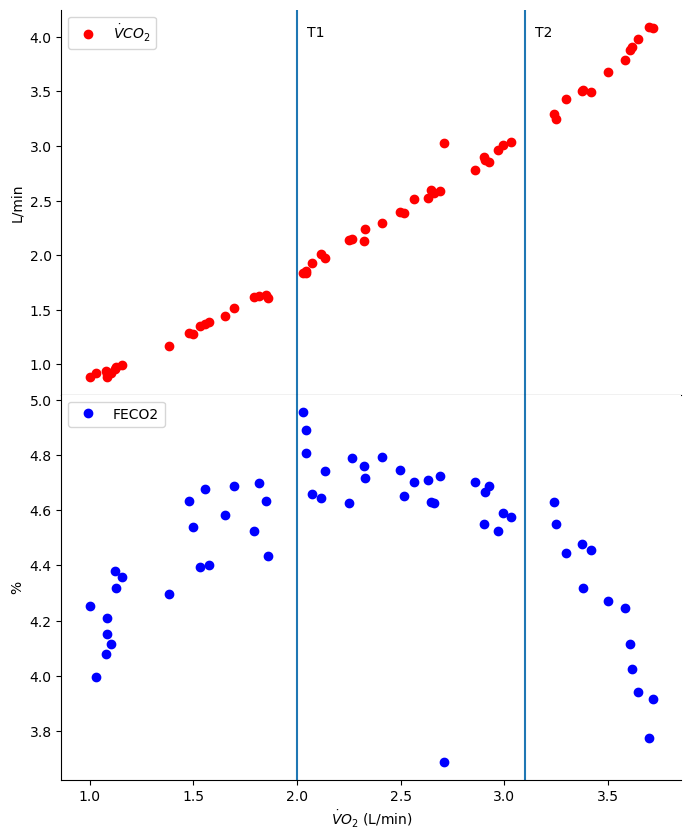

In [7]:
# assign variable names
x1 = df['VO2']
y2 = df['VCO2']
y3 = df['FECO2']

# making the subplots
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 10))
fig.subplots_adjust(hspace=0)

# first plot
ax[0].plot(x1, y2, 'o', label=('$\dot VCO_2$'), c='r' )
ax[0].spines[['right', 'top']].set_visible(False)
ax[0].set(ylabel=('L/min'))
ax[0].legend()
ax[0].axvline(x=2.0)
ax[0].axvline(x=3.1)
ax[0].text(2.05, 4.0, 'T1')
ax[0].text(3.15, 4.0, 'T2')

# Second plot
ax[1].plot(x1, y3, 'o', label=('FECO2'), c='b')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel=('%'))
ax[1].set(xlabel=('$\dot VO_2$ (L/min)'))
ax[1].legend(loc='upper left')
ax[1].axvline(x=2.0)
ax[1].axvline(x=3.1)

# save figure
fig.savefig("VCO2-FECO2-1432.png", dpi=300, bbox_inches = "tight")
fig.show()